### Import all the modules that we need

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from tensorflow.keras.preprocessing.text import Tokenizer  
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers
from tensorflow.keras.utils import plot_model
import tensorflow as tf
import keras 

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from collections import Counter
from pathlib import Path
import os
import numpy as np
import re
import string
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.corpus import wordnet
import unicodedata
import html
stop_words = stopwords.words('english')

2024-08-29 21:04:34.313986: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-29 21:04:34.453224: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-29 21:04:34.599672: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-29 21:04:34.733561: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-29 21:04:34.771534: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-29 21:04:35.002857: I tensorflow/core/platform/cpu_feature_gu

### Used functions 

In [10]:
import os
import tarfile
import urllib.request

def fetch_data(dataset_url, dataset_path, compressed_file_name="dataset.tgz"):
    """
    Downloads and extracts a dataset from a given URL.

    Parameters:
    - dataset_url: str, the URL to download the dataset from.
    - dataset_path: str, the local directory where the dataset should be stored.
    - compressed_file_name: str, the name of the compressed file (default is 'dataset.tgz').
    """
    # Create the directory if it doesn't exist
    os.makedirs(dataset_path, exist_ok=True)
    
    # Define the full path to the compressed file
    tgz_path = os.path.join(dataset_path, compressed_file_name)
    
    # Download the dataset
    urllib.request.urlretrieve(dataset_url, tgz_path)
    
    # Extract the contents of the compressed file
    with tarfile.open(tgz_path) as dataset_tgz:
        dataset_tgz.extractall(path=dataset_path)

    print(f"Dataset downloaded and extracted to {dataset_path}")

In [11]:
import os
from pathlib import Path

def print_directory_structure(current_directory):
    """
    Prints the directory structure starting from the given directory.
    
    This function recursively walks through the directory tree starting from 
    `current_directory` and prints the names of directories and files in a 
    structured format. Each level of indentation represents a deeper level 
    in the directory tree. For each directory, only the first 3 files are 
    printed followed by '...' if there are more files.
    
    Parameters:
    current_directory (str or Path): The root directory from which to start 
                                     listing the directory structure.
    
    Returns:
    None
    
    Example:
    >>> print_directory_structure('/path/to/directory')
    directory/
        subdir1/
            file1.txt
            file2.txt
            file3.txt
            ...
        subdir2/
            file1.txt
            file2.txt
            file3.txt
            ...
    """
    # Ensure the input is a Path object
    current_directory = Path(current_directory)
    
    # Determine the base level of the directory tree
    base_level = len(current_directory.parts)

    # Walk through the directory tree
    for name, subdirs, files in os.walk(current_directory):
        # Calculate the indentation level
        indent = len(Path(name).parts) - base_level
        
        # Print the directory name with appropriate indentation
        print("    " * indent + Path(name).parts[-1] + os.sep)
        
        # Print the files in the directory, limiting to the first 3
        for index, filename in enumerate(sorted(files)):
            if index == 3:
                print("    " * (indent + 1) + "...")
                break
            print("    " * (indent + 1) + filename)

In [12]:
import re
re1 = re.compile(r'  +')
import html

def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words, stop_words):
    """
    :param words:
    :type words:
    :param stop_words: from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
    or
    from spacy.lang.en.stop_words import STOP_WORDS
    :type stop_words:
    :return:
    :rtype:
    """
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

def lemmatize_words(words):
    """Lemmatize words in text"""

    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(word) for word in words]

def lemmatize_verbs(words):
    """Lemmatize verbs in text"""

    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words, stop_words)
    #words = stem_words(words)# Either stem ovocar lemmatize
    words = lemmatize_words(words)
    words = lemmatize_verbs(words)

    return ''.join(words)

In [13]:
# A function to normalize the whole text

def normalize_corpus(corpus):
    return [normalize_text(t) for t in corpus]

### Getting the data

In [3]:
# # Fetching the data
# HOUSING_URL = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
# HOUSING_PATH = os.path.join("aclimdb")
# fetch_data(HOUSING_URL, HOUSING_PATH, "aclImdb_v1.tar.gz")

In [2]:
current_directory = os.getcwd()
current_directory

'/home/mhmd/Desktop/comment classification'

In [14]:
# Get the current working directory
current_directory = os.getcwd()
print_directory_structure(current_directory)

comment classification/
    Comment_class.ipynb
    my_keras_model.keras
    aclimdb/
        aclImdb_v1.tar.gz
        aclImdb/
            README
            imdb.vocab
            imdbEr.txt
            train/
                labeledBow.feat
                unsupBow.feat
                urls_neg.txt
                ...
                neg/
                    0_3.txt
                    10000_4.txt
                    10001_4.txt
                    ...
                unsup/
                    0_0.txt
                    10000_0.txt
                    10001_0.txt
                    ...
                pos/
                    0_9.txt
                    10000_8.txt
                    10001_10.txt
                    ...
            test/
                labeledBow.feat
                urls_neg.txt
                urls_pos.txt
                neg/
                    0_2.txt
                    10000_4.txt
                    10001_1.txt
                    ...
                p

In [15]:
trian_pos_directory = current_directory + '/aclimdb/aclImdb/train/pos'
train_neg_directory = current_directory + '/aclimdb/aclImdb/train/neg'
test_pos_directory = current_directory + '/aclimdb/aclImdb/test/pos'
test_neg_directory = current_directory + '/aclimdb/aclImdb/test/neg'

In [16]:
# List all files in the training folder
train_pos_data = [file for file in os.listdir(trian_pos_directory)]
train_neg_data = [file for file in os.listdir(train_neg_directory)]
test_pos_data = [file for file in os.listdir(test_pos_directory)]
test_neg_data = [file for file in os.listdir(test_neg_directory)]


In [17]:
# looping throw the train pos and train neg dataset
def getting_comments(file_list , directory, value):
    comments = []
    label = [] 
    for file in file_list:
        with open(directory+'/'+ file, 'r') as file:
            comment = file.read()
            comments.append(comment)
            label.append(value)
    return comments, label

In [18]:
train_pos, label_train_pos = getting_comments(train_pos_data, trian_pos_directory, 1)
train_neg, label_train_neg = getting_comments(train_neg_data, train_neg_directory, 0)
test_pos, label_test_pos = getting_comments(test_pos_data, test_pos_directory, 1)
test_neg, label_test_neg = getting_comments(test_neg_data, test_neg_directory, 0)

In [19]:
trn_labels = label_train_pos + label_train_neg; tst_labels = label_test_pos + label_test_pos

### Preparing the text 

In [20]:
# Cleaning the whole data sets 
train_pos = normalize_corpus(train_pos);train_neg = normalize_corpus(train_neg)
test_pos = normalize_corpus(test_pos); test_neg = normalize_corpus(test_neg)


In [22]:
# Creating a data set for the training set and testing set 

trn_set = train_pos + train_neg; tst_set = test_pos + test_neg

### Vectorization 

In [23]:
# putting all the data into one list

texts = train_pos + train_neg + test_pos + test_neg

In [24]:
# First determine the max len for any review 
max_len = 10000

In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
tok = Tokenizer(num_words=max_len, oov_token='UNK')
tok.fit_on_texts(texts)

In [26]:
# Creating a BOW using tfidf for the train set 
x_train = tok.texts_to_matrix(trn_set, mode = 'freq')
# Creating a BOW using tfidf for the test set 
x_test = tok.texts_to_matrix(tst_set, mode = 'freq')
# Creating a y_train and y_test
y_train = np.asarray(trn_labels).astype('float32')
y_test = np.asarray(tst_labels).astype('float32')

In [27]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000, 10000)
(25000,)
(25000, 10000)
(25000,)


* The word counts suffer some issues: most frequent words are usually not important (like stop words), while they take high focus/count.

### Advantages of the Bag of Words (BoW) Model:

1. **Simplicity**:
   - The BoW model is straightforward to implement and understand. It represents text data in a simple form by counting the frequency of words, making it easy to use as a baseline in text processing tasks.

2. **Effective for Small to Medium-sized Datasets**:
   - In cases where the dataset is relatively small and the vocabulary is not too large, BoW can perform well, especially in text classification tasks like spam detection or sentiment analysis.

3. **No Need for Linguistic Knowledge**:
   - The BoW model does not require any linguistic expertise or complex preprocessing, such as parsing or semantic analysis. This allows it to be applied to any language without modification.

4. **Works Well with Machine Learning Algorithms**:
   - Many machine learning algorithms (like Naive Bayes, SVMs, and logistic regression) work well with BoW features, making it a versatile choice for text classification.

### Disadvantages of the Bag of Words (BoW) Model:

1. **Loss of Context**:
   - BoW ignores the order of words and their semantic meaning. This means that important context and the relationship between words are lost. For example, "not good" and "good" would be treated similarly.

2. **High Dimensionality**:
   - BoW creates a large sparse matrix where each word in the vocabulary becomes a feature. For large datasets with extensive vocabularies, this results in a high-dimensional feature space, leading to increased computational costs and the risk of overfitting.

3. **Lack of Semantic Information**:
   - BoW does not capture synonyms, polysemy (words with multiple meanings), or the importance of different words in a text. All words are treated equally, which can limit the model's ability to understand the nuances of the text.

4. **Sensitivity to Noise**:
   - The BoW model is sensitive to noise such as stop words, punctuation, and irrelevant text. This can lead to less accurate models if not properly preprocessed (e.g., removing stop words, stemming, or lemmatization).

5. **Scalability Issues**:
   - As the size of the text data increases, the vocabulary grows, leading to scalability issues. The resulting sparse matrix can become difficult to manage and process efficiently.

These advantages and disadvantages highlight the trade-offs when using the Bag of Words model, particularly in comparison to more advanced models like TF-IDF, word embeddings, or deep learning-based approaches.

## Modeling 

In [28]:
from tensorflow.keras import models, layers, losses, metrics, optimizers, regularizers
from functools import partial
RegularizedDense = partial(layers.Dense,
activation="selu",
kernel_initializer="lecun_normal",
kernel_regularizer=regularizers.l2(0.01))

model = models.Sequential([
    RegularizedDense(16),
    layers.Dropout(rate=0.2),
    RegularizedDense(16),
    layers.Dropout(rate=0.2),
    RegularizedDense(1, activation='sigmoid', kernel_initializer="glorot_uniform")
])

I0000 00:00:1724955147.269034    4227 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-08-29 21:12:27.271418: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [29]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
restore_best_weights=True)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.keras",
save_best_only=True)

In [30]:
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [31]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.4, random_state=42)

In [32]:
len(x_test), len(x_val)

(25000, 10000)

In [33]:
history = model.fit(x_train,
                    y_train,
                    epochs=100,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - binary_accuracy: 0.5303 - loss: 0.7934 - val_binary_accuracy: 0.4962 - val_loss: 0.6942
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - binary_accuracy: 0.5028 - loss: 0.6935 - val_binary_accuracy: 0.4962 - val_loss: 0.6932
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - binary_accuracy: 0.5088 - loss: 0.6931 - val_binary_accuracy: 0.4962 - val_loss: 0.6931
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - binary_accuracy: 0.4960 - loss: 0.6932 - val_binary_accuracy: 0.4962 - val_loss: 0.6932
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - binary_accuracy: 0.5096 - loss: 0.6931 - val_binary_accuracy: 0.5038 - val_loss: 0.6931
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - binary_accuracy: 0.4888 - loss: 0.6932 - val_binary_accuracy: 0.4962 - val_loss: 0.6932
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - binary_accuracy: 0.5085 - loss: 0.6931 - val_binary_accuracy: 0.4962 - val_loss: 0

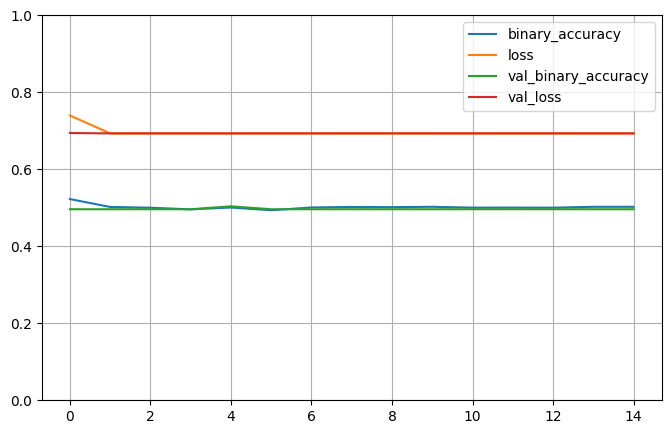

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

* under fitting 

#### After a trying alot of hyperparameters i found out the most appropriate are those

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers

model_1 = models.Sequential()
model_1.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_1.add(layers.Dropout(rate=0.2))
model_1.add(layers.Dense(16, activation='relu'))
model_1.add(layers.Dropout(rate=0.2))
model_1.add(layers.Dense(1, activation='sigmoid'))
model_1.summary()

/home/mhmd/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [36]:
from tensorflow.keras import losses
from tensorflow.keras import metrics
from tensorflow.keras import optimizers

model_1.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [37]:
history = model_1.fit(x_train,
                    y_train,
                    epochs=21,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/21
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - binary_accuracy: 0.5079 - loss: 0.6930 - val_binary_accuracy: 0.5595 - val_loss: 0.6924
Epoch 2/21
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - binary_accuracy: 0.5665 - loss: 0.6919 - val_binary_accuracy: 0.5130 - val_loss: 0.6909
Epoch 3/21
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - binary_accuracy: 0.5714 - loss: 0.6902 - val_binary_accuracy: 0.6609 - val_loss: 0.6887
Epoch 4/21
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - binary_accuracy: 0.6095 - loss: 0.6878 - val_binary_accuracy: 0.6544 - val_loss: 0.6856
Epoch 5/21
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - binary_accuracy: 0.6255 - loss: 0.6844 - val_binary_accuracy: 0.6865 - val_loss: 0.6813
Epoch 6/21
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - binary_accuracy: 0.6646 - loss: 0.6796 - val_binary_accuracy: 0.7370 - val_loss: 0.6754
Epoch 7/21
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - binary_accuracy: 0.6844 - loss: 0.6741 - val_binary_accuracy: 0.6550 - val_loss: 0.6684
Epoch 8/21
30

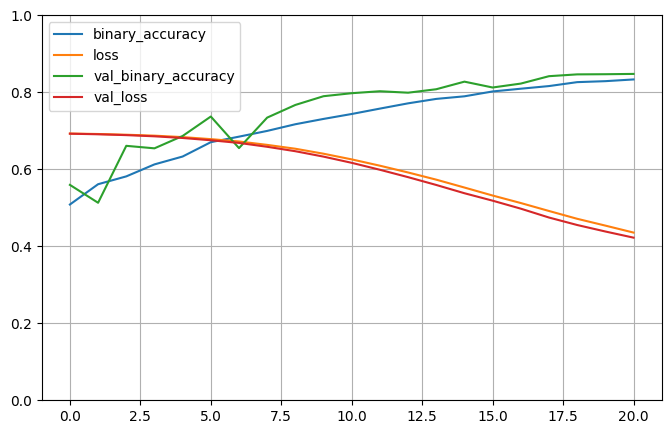

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

# After trying alot this is the best result i have achieved

In [42]:
from tensorflow.keras import models
from tensorflow.keras import layers

model_3 = models.Sequential()
model_3.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model_3.add(layers.Dense(16, activation='relu'))
model_3.add(layers.Dense(1, activation='sigmoid'))
model_3.summary()

/home/mhmd/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
model_3.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [46]:
history_3 = model_3.fit(x_train,
                    y_train,
                    epochs=100,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - binary_accuracy: 0.5115 - loss: 0.6930 - val_binary_accuracy: 0.5916 - val_loss: 0.6925
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - binary_accuracy: 0.5598 - loss: 0.6923 - val_binary_accuracy: 0.5399 - val_loss: 0.6916
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - binary_accuracy: 0.5649 - loss: 0.6912 - val_binary_accuracy: 0.5241 - val_loss: 0.6903
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - binary_accuracy: 0.5884 - loss: 0.6895 - val_binary_accuracy: 0.6713 - val_loss: 0.6879
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - binary_accuracy: 0.6721 - loss: 0.6870 - val_binary_accuracy: 0.7009 - val_loss: 0.6846
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - binary_accuracy: 0.6909 - loss: 0.6836 - val_binary_accuracy: 0.7133 - val_loss: 0.6799
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - binary_accuracy: 0.6865 - loss: 0.6783 - val_binary_accuracy: 0.7267 - val_loss: 0.6736
Epoch 

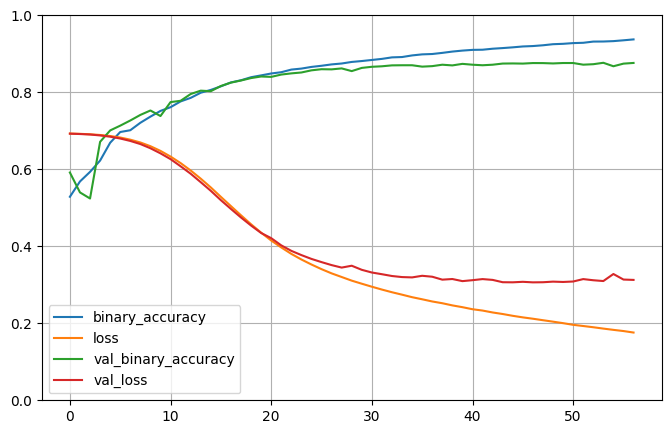

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history_3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [48]:
# Find the epoch with the lowest validation loss
best_epoch = np.argmin(history_3.history['val_loss']) + 1

print(f"The best model was at epoch {best_epoch}")

The best model was at epoch 47


In [50]:
# testing the data on the test test
model_3.evaluate(x_test, y_test)

 67/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - binary_accuracy: 0.8853 - loss: 0.2921

2024-08-29 22:22:00.957020: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - binary_accuracy: 0.7680 - loss: 0.7079


[1.6393450498580933, 0.5098000168800354]